# Dfs2

[DFS - Reference manual](https://docs.mikepoweredbydhi.com/core_libraries/dfs/dfs-file-system/)

In [61]:
import numpy as np
import matplotlib.pyplot as plt

## Reading data

In [62]:
from mikeio import Dfs2

dfs = Dfs2("data/gebco_sound.dfs2")

dfs

<mikeio.Dfs2>
dx: 0.00417
dy: 0.00417
Items:
  0:  Elevation <Total Water Depth> (meter)
Time: time-invariant file (1 step)

In [63]:
ds = dfs.read()
ds

<mikeio.DataSet>
Dimensions: (1, 264, 216)
Time: 2020-05-15 11:04:52 - 2020-05-15 11:04:52
Items:
  0:  Elevation <Total Water Depth> (meter)

In [64]:
type(ds)

mikeio.dataset.Dataset

In [65]:
ds.shape

(1, 264, 216)

In [66]:
elevation = ds['Elevation']
type(elevation)

numpy.ndarray

In [67]:
elevation.shape

(1, 264, 216)

Text(0, 0.5, 'Row # (starting at the top)')

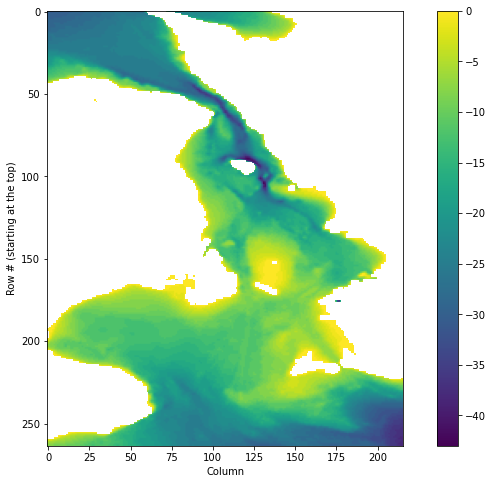

In [68]:
plt.subplots(figsize=(12,8))
plt.imshow(elevation[0])
plt.colorbar()
plt.xlabel("Column")
plt.ylabel("Row # (starting at the top)")

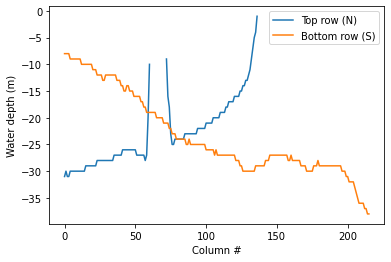

In [69]:
plt.plot(elevation[0,0,:], label="Top row (N)")
plt.plot(elevation[0,-1,:], label="Bottom row (S)")
plt.xlabel("Column #")
plt.ylabel("Water depth (m)")
plt.legend()

## Spatial axes

In [70]:
dfs.latitude, dfs.longitude

(55.20208333333332, 12.20208333333332)

In [71]:
dfs.dy, dfs.dx

(0.004166666883975267, 0.004166666883975267)

In [72]:
ny = elevation.shape[1]
nx = elevation.shape[2]
ny, nx

(264, 216)

In [73]:
lats = [dfs.latitude + dfs.dy*i  for i in range(ny)]
lons = [dfs.longitude + dfs.dx*i  for i in range(nx)]

In [74]:
lats[0], lats[-1]

(55.20208333333332, 56.297916723818815)

In [75]:
lons[0], lons[-1]

(12.20208333333332, 13.097916713388003)

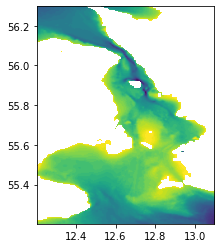

In [76]:
plt.imshow(elevation[0], extent=(lons[0], lons[-1], lats[0], lats[-1]))

## Extract data at location

In [77]:
stn = 12.74792, 55.865
k,j = dfs.find_nearest_elements(lon=stn[0],lat=stn[1])
print(k,j)

104 131


Text(0.5, 1.0, 'Indexed by row/column')

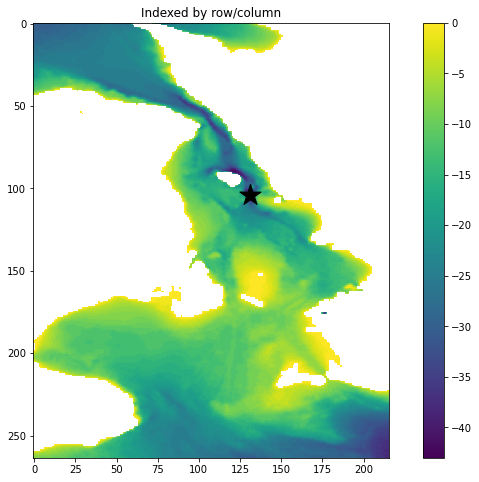

In [78]:
plt.subplots(figsize=(12,8))
plt.imshow(elevation[0])
plt.colorbar()
plt.scatter(j,k,marker='*',s=500,c='black')
plt.title("Indexed by row/column")

Text(12.3, 55.8, 'Denmark')

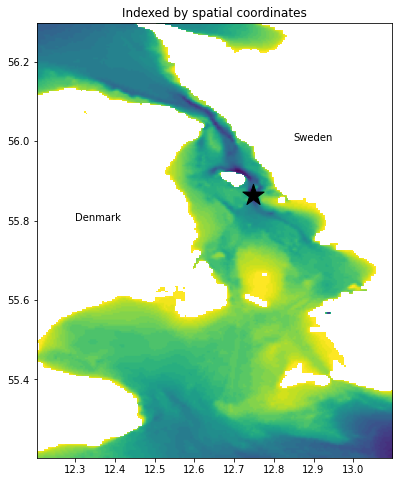

In [79]:
plt.subplots(figsize=(12,8))
plt.imshow(elevation[0], extent=(lons[0], lons[-1], lats[0], lats[-1]))
plt.scatter(stn[0],stn[1],marker='*',s=500,c='black')
plt.title("Indexed by spatial coordinates")
plt.text(12.85, 56.0, "Sweden")
plt.text(12.3, 55.8, "Denmark")

In [80]:
import numpy as np

# Find minimum value
idx_1d = np.nanargmin(elevation)
idx_1d

22595

In [81]:
idx = np.unravel_index(idx_1d, elevation.shape)
idx

(0, 104, 131)

In [82]:
elevation[idx]

-43.0

## Slicing

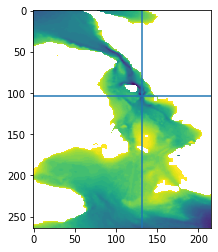

In [83]:
plt.imshow(elevation[0])
plt.axvline(j)
plt.axhline(k)

Text(0.5, 1.0, 'North-South')

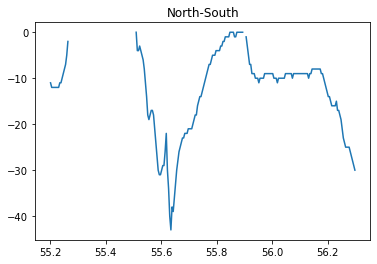

In [86]:
plt.plot(lats, elevation[0,:,j])
plt.title("North-South")

Text(0.5, 1.0, 'West-East')

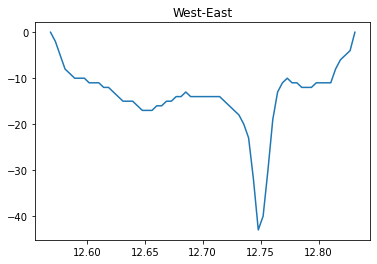

In [87]:
plt.plot(lons, elevation[0,k,:])
plt.title("West-East")